## Global Monthly CO2 Levels

In [1]:
import json 
import pandas as pd 
import numpy as np 
import math 
import itertools 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure 
from load_dataset import TimeSeries 

In [2]:
# True labels
annotations = pd.read_json('TCPD-master/annotations.json')
annotations[['global_co2']]

,global_co2
6,[]
7,"[46, 90]"
8,[]
9,"[47, 91]"
10,NaN
12,NaN
13,[]
14,NaN


In [3]:
# List true changepoints
annotator_df = pd.read_json('TCPD-master/annotations.json') 
global_co2_df = annotator_df[['global_co2']] 
list2d = np.array(global_co2_df).flatten() 
list2d = [l for l in list2d if (type(l)==list)] 
global_co2_annotation_lst = list(itertools.chain.from_iterable(list2d))
global_co2_annotation_lst

[46, 90, 47, 91]

t         int64
Mean    float64
date     object
dtype: object


<Figure size 960x480 with 0 Axes>

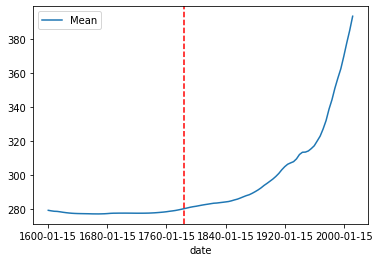

In [4]:
# Plot true changepoints
from load_dataset import TimeSeries
ts = TimeSeries.from_json('TCPD-master/datasets/global_co2/global_co2.json')
global_co2_df = ts.df
global_co2_df['date'] =ts.datestr
print(global_co2_df.dtypes)
figure(figsize=(12, 6), dpi=80)
global_co2_df.plot('date', 'Mean')
global_co2_df['is_CPD'] = np.where(global_co2_df.t.isin(global_co2_annotation_lst), 1,0)
plt.axvline(global_co2_df.loc[global_co2_df['is_CPD']==1][['t']].values[0], color='red', linestyle='--')

In [13]:
print(global_co2_df[46:92])

     t        Mean        date  is_CPD
46  46  280.075871  1784-01-15       1
47  47  280.469887  1788-01-15       1
48  48  280.881666  1792-01-15       0
49  49  281.213576  1796-01-15       0
50  50  281.481045  1800-01-15       0
51  51  281.808904  1804-01-15       0
52  52  282.148594  1808-01-15       0
53  53  282.444978  1812-01-15       0
54  54  282.713875  1816-01-15       0
55  55  282.998032  1820-01-15       0
56  56  283.267285  1824-01-15       0
57  57  283.379202  1828-01-15       0
58  58  283.595363  1832-01-15       0
59  59  283.807428  1836-01-15       0
60  60  284.030767  1840-01-15       0
61  61  284.265360  1844-01-15       0
62  62  284.685269  1848-01-15       0
63  63  285.210038  1852-01-15       0
64  64  285.671793  1856-01-15       0
65  65  286.328562  1860-01-15       0
66  66  287.043461  1864-01-15       0
67  67  287.724559  1868-01-15       0
68  68  288.266797  1872-01-15       0
69  69  289.108053  1876-01-15       0
70  70  290.065054  1880-

In [6]:
# BOCPD model
from kats.detectors.bocpd import BOCPDetector, BOCPDModelType, TrendChangeParameters
from kats.consts import TimeSeriesData
import datetime as dt

df = global_co2_df.iloc[20:]
df['time']= pd.to_datetime(df['date'])
#df['date'] = df['date'].apply(lambda x: dt.datetime.strptime(x,'%YYYY-%mm-%dd') if type(x)==str else pd.NaT)
#tsd = TimeSeriesData(df)
df



<ipython-input-6-27345f18ac2c>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,t,Mean,date,is_CPD,time
20,20,277.166481,1680-01-15,0,1680-01-15
21,21,277.309647,1684-01-15,0,1684-01-15
22,22,277.390242,1688-01-15,0,1688-01-15
23,23,277.405034,1692-01-15,0,1692-01-15
24,24,277.433458,1696-01-15,0,1696-01-15
...,...,...,...,...,...
99,99,362.468859,1996-01-15,0,1996-01-15
100,100,369.785474,2000-01-15,0,2000-01-15
101,101,377.646011,2004-01-15,0,2004-01-15
102,102,385.022052,2008-01-15,0,2008-01-15


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ax/core/parameter.py:467: UserWarning:

`sort_values` is not specified for `ChoiceParameter` "known_prec_multiplier". Defaulting to `True` for parameters of `ParameterType` FLOAT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ax/core/parameter.py:467: UserWarning:

`sort_values` is not specified for `ChoiceParameter` "cp_prior". Defaulting to `True` for parameters of `ParameterType` FLOAT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.



total changepoints-->  1


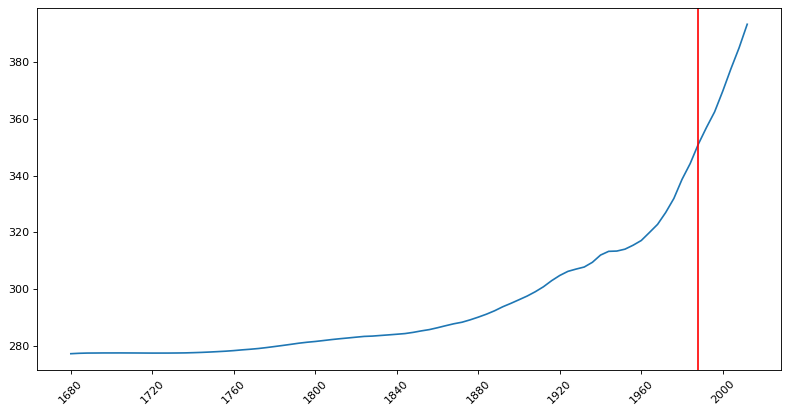

In [7]:
# Initialize the detector
tsd = TimeSeriesData(df.loc[:,['time','Mean']])
detector = BOCPDetector(tsd)


changepoints = detector.detector(
    model=BOCPDModelType.NORMAL_KNOWN_MODEL, # this is the default choice
    #model_parameters=[known_prec_multiplier=1.0]
    lag=5,
    changepoint_prior=.1,#prior belief
    threshold=.7
)

print('total changepoints--> ', len(changepoints))

figure(figsize=(12, 6), dpi=80)
# Plot the data
plt.xticks(rotation=45)
detector.plot(changepoints)
plt.show()

In [8]:
changepoints

[(TimeSeriesChangePoint(start_time: 1988-01-15T00:00:00.000000000, end_time: 1988-01-15T00:00:00.000000000, confidence: 0.7203015151773707),
  <kats.detectors.bocpd.BOCPDMetadata at 0x7f94c2655820>)]

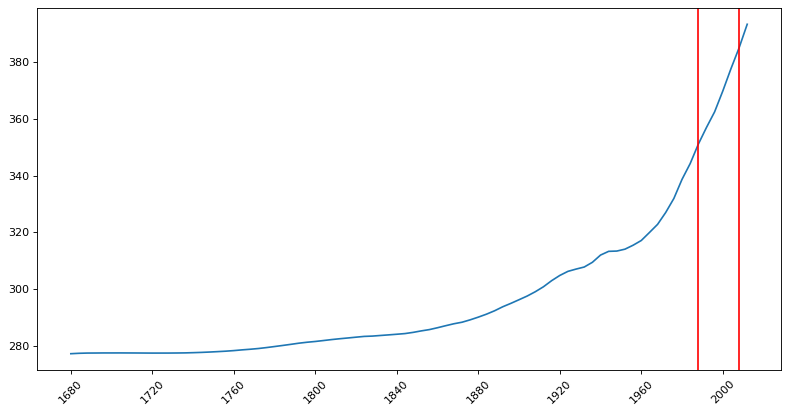

In [9]:
#Robust Stat Detector
from kats.detectors.robust_stat_detection import RobustStatDetector

detector = RobustStatDetector(tsd)
change_points = detector.detector(comparison_window=5, smoothing_window_size=5, p_value_cutoff=0.05)
figure(figsize=(12, 6), dpi=80)
plt.xticks(rotation=45)
detector.plot(change_points)
plt.show()

In [10]:
change_points

[(TimeSeriesChangePoint(start_time: 1988-01-15T00:00:00.000000000, end_time: 1988-01-15T00:00:00.000000000, confidence: 0.9779354219956856),
  <kats.detectors.robust_stat_detection.RobustStatMetadata at 0x7f94c26381f0>),
 (TimeSeriesChangePoint(start_time: 2008-01-15T00:00:00.000000000, end_time: 2008-01-15T00:00:00.000000000, confidence: 0.9997161949337083),
  <kats.detectors.robust_stat_detection.RobustStatMetadata at 0x7f94c26381c0>)]

total changepoints-->  1


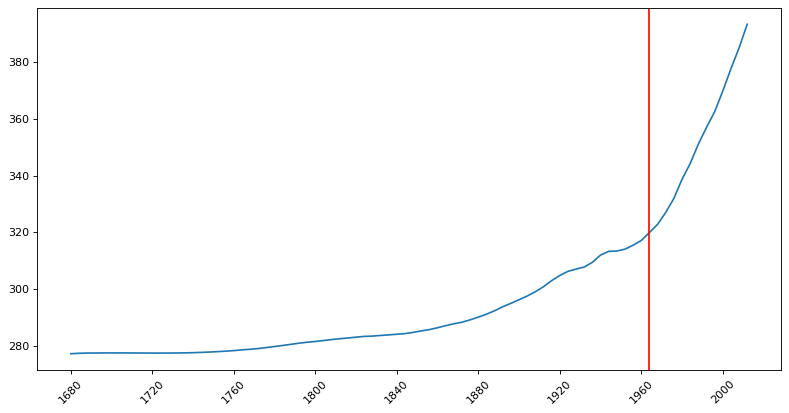

In [11]:
# CUSUM
from kats.detectors.cusum_detection import CUSUMDetector


# Initialize the detector
detector = CUSUMDetector(tsd)

change_points = detector.detector(threshold=0.05)

print('total changepoints--> ', len(change_points))

figure(figsize=(12, 6), dpi=80)
# Plot the data
plt.xticks(rotation=45)
detector.plot(change_points)
plt.show()

In [12]:
change_points

[(TimeSeriesChangePoint(start_time: 1964-01-15 00:00:00, end_time: 1964-01-15 00:00:00, confidence: 1.0),
  <kats.detectors.cusum_detection.CUSUMMetadata at 0x7f94ba64de80>)]

#### Annotation -> 1784, 1788, 1960, 1964
#### BOCPD -> 1988
#### RobustStatDetector -> 1988, 2008
#### CUSUM -> 1964